In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [5]:
# set seed value

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [6]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_train = X_train.astype("float32")
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype("float32") / 255
Y_train = np_utils.to_categorical(Y_class_train)
Y_test = np_utils.to_categorical(Y_class_test)

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [10]:
# cpu 혼자만으로 감당을 못하기에 gpu 환경에서 꼭 실행해야됨
# tf.config.run_functions_eagerly(True)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05421, saving model to ./model\01-0.0542.hdf5

Epoch 00002: val_loss improved from 0.05421 to 0.04064, saving model to ./model\02-0.0406.hdf5

Epoch 00003: val_loss improved from 0.04064 to 0.03740, saving model to ./model\03-0.0374.hdf5

Epoch 00004: val_loss improved from 0.03740 to 0.03232, saving model to ./model\04-0.0323.hdf5

Epoch 00005: val_loss improved from 0.03232 to 0.03198, saving model to ./model\05-0.0320.hdf5

Epoch 00006: val_loss improved from 0.03198 to 0.02985, saving model to ./model\06-0.0298.hdf5

Epoch 00007: val_loss did not improve from 0.02985

Epoch 00008: val_loss did not improve from 0.02985

Epoch 00009: val_loss improved from 0.02985 to 0.02917, saving model to ./model\09-0.0292.hdf5

Epoch 00010: val_loss did not improve from 0.02917

Epoch 00011: val_loss improved from 0.02917 to 0.02902, saving model to ./model\11-0.0290.hdf5

Epoch 00012: val_loss improved from 0.02902 to 0.02523, saving model to ./model

In [11]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0325 - accuracy: 0.9931

 Test Accuracy: 0.9931


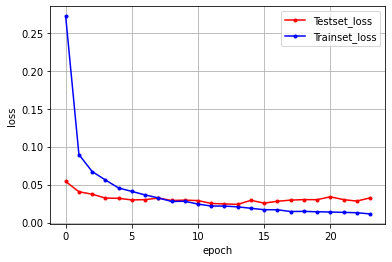

In [12]:
y_vloss = history.history["val_loss"]

y_loss = history.history["loss"]

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")

plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc="upper right")

plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()